Problem Statement

The dataset contain details of users like User ID, Gender, Age, EstimatedSalary and Purchased. The data shows whether a person is likely to purchase the artefacts advertised or not. Based on the data we have to generate a model that can predict whether the person will make a purchase or not.


In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#Read Data
ad_data=pd.read_csv("Social_Network_Ads.csv")
print(ad_data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


### Data Preprocessing

In [3]:
#Data Analysis(Know your Data)
print(ad_data.shape)
print(ad_data.info())

(400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [4]:
#Check Null Values
ad_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
#Label Encoder (Handling Categorical Variables)
lc=LabelEncoder()
ad_data["Gender"]=lc.fit_transform(ad_data["Gender"])
print(ad_data.head(20))

     User ID  Gender  Age  EstimatedSalary  Purchased
0   15624510       1   19            19000          0
1   15810944       1   35            20000          0
2   15668575       0   26            43000          0
3   15603246       0   27            57000          0
4   15804002       1   19            76000          0
5   15728773       1   27            58000          0
6   15598044       0   27            84000          0
7   15694829       0   32           150000          1
8   15600575       1   25            33000          0
9   15727311       0   35            65000          0
10  15570769       0   26            80000          0
11  15606274       0   26            52000          0
12  15746139       1   20            86000          0
13  15704987       1   32            18000          0
14  15628972       1   18            82000          0
15  15697686       1   29            80000          0
16  15733883       1   47            25000          1
17  15617482       1   45   

In [6]:
print(ad_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB
None


In [7]:
#Dropping irrelevent features
ad_data.drop('User ID',axis=1,inplace=True)

In [8]:
print(ad_data.describe())

           Gender         Age  EstimatedSalary   Purchased
count  400.000000  400.000000       400.000000  400.000000
mean     0.490000   37.655000     69742.500000    0.357500
std      0.500526   10.482877     34096.960282    0.479864
min      0.000000   18.000000     15000.000000    0.000000
25%      0.000000   29.750000     43000.000000    0.000000
50%      0.000000   37.000000     70000.000000    0.000000
75%      1.000000   46.000000     88000.000000    1.000000
max      1.000000   60.000000    150000.000000    1.000000


In [9]:
#Segregate Dependent and Independent Variables
x=ad_data[["Gender","Age","EstimatedSalary"]]  #Independent Variables
y=ad_data["Purchased"]

In [10]:
#Scaling Data (Due to imbalance)
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[ 1.02020406 -1.78179743 -1.49004624]
 [ 1.02020406 -0.25358736 -1.46068138]
 [-0.98019606 -1.11320552 -0.78528968]
 ...
 [-0.98019606  1.17910958 -1.46068138]
 [ 1.02020406 -0.15807423 -1.07893824]
 [-0.98019606  1.08359645 -0.99084367]]


In [11]:
#Spliting Dataset into Train and Test sets (Bias-Variance Trade off)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(280, 3) (120, 3)
(280,) (120,)


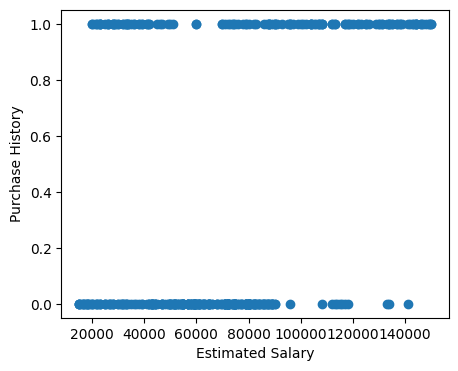

In [12]:
plt.figure(figsize=(5,4))
plt.scatter(ad_data["EstimatedSalary"],ad_data["Purchased"])
plt.xlabel("Estimated Salary")
plt.ylabel("Purchase History")
plt.show()

## End of Data Preprocessing

In [14]:
#Train the Model-Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred=lr.predict(x_train) #prediction on known data
print(y_pred)

[1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1
 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1]


In [22]:
print(metrics.confusion_matrix(y_train,y_pred))

[[160  14]
 [ 31  75]]


In [17]:
print("Accuracy on known Data:",metrics.accuracy_score(y_train,y_pred))

Accuracy on known Data: 0.8392857142857143


In [23]:
#predictions on unknown data
y_pred=lr.predict(x_test)
print(y_pred)

[0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 0 0 1 0 0 1 0 1]


In [24]:
print("Accuracy on unknown Data:",metrics.accuracy_score(y_test,y_pred))

Accuracy on unknown Data: 0.875


In [25]:
print(metrics.confusion_matrix(y_test,y_pred))

[[75  8]
 [ 7 30]]


In [27]:
#Calculate Precision and Recall
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Precision: 0.7894736842105263
Recall: 0.8108108108108109


In [28]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        83
           1       0.79      0.81      0.80        37

    accuracy                           0.88       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.88      0.88      0.88       120

